#### 0528
1. 특징적인 점 n개가 제대로 잡히면,  Tranasform도 잘 되는가?
 - 직접 점을 정확히 찍어서 변환 확인해보기 
 - 일단 되는건지 확실히 보기

2. 잇몸만 분리해서 뾰족한 부분을 특징점으로 찾아내기

3. 사용자가 직접 점을 찍어서 반환하는 것도 생각하기

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 영상 불러오기
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
a_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/after.png')

b_img = cv2.cvtColor(b_img, cv2.COLOR_BGR2RGB)
a_img = cv2.cvtColor(a_img, cv2.COLOR_BGR2RGB)

# b_gray = cv2.cvtColor(b_img, cv2.COLOR_BGR2GRAY)
# a_gray = cv2.cvtColor(a_img, cv2.COLOR_BGR2GRAY)


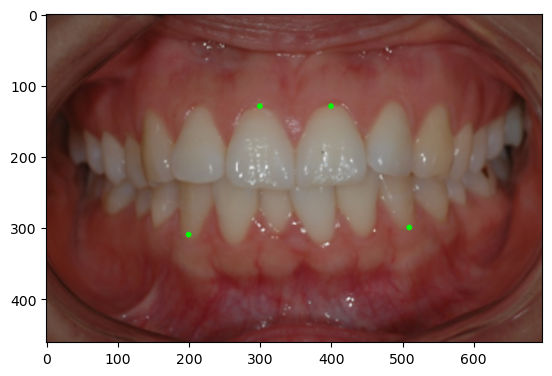

In [17]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')

b_gray = cv2.cvtColor(b_img, cv2.COLOR_BGR2RGB)

b = b_gray.copy()


b_centers = [(300, 130), (200, 310), (400, 130), (510,300)]

for center in b_centers:
    cv2.circle(b, center, 4, (0,255,0), -1)


plt.imshow(b)
plt.show()

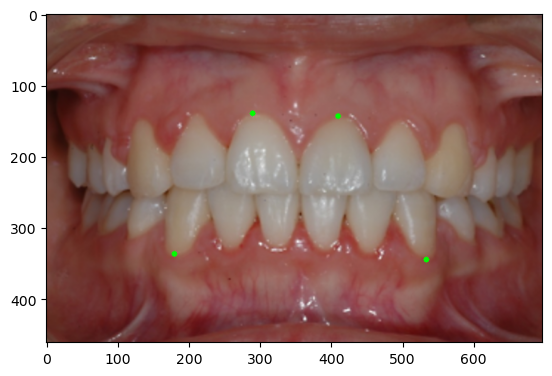

In [19]:
a_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/after.png')

a_gray = cv2.cvtColor(a_img, cv2.COLOR_BGR2RGB)

a = a_gray.copy()


a_centers = [(290, 140), (180,337), (410,144), (534,345)]

for center in a_centers:
    cv2.circle(a, center, 4, (0,255,0), -1)



plt.imshow(a)
plt.show()

array([[300, 130],
       [200, 310],
       [400, 130],
       [510, 300]])

<class 'numpy.ndarray'>
[[ 1.15502484e+00  9.44018473e-02 -6.78523436e+01]
 [ 2.29840200e-02  1.23388039e+00 -2.68519703e+01]
 [-1.19054794e-04  2.99339975e-04  1.00000000e+00]]


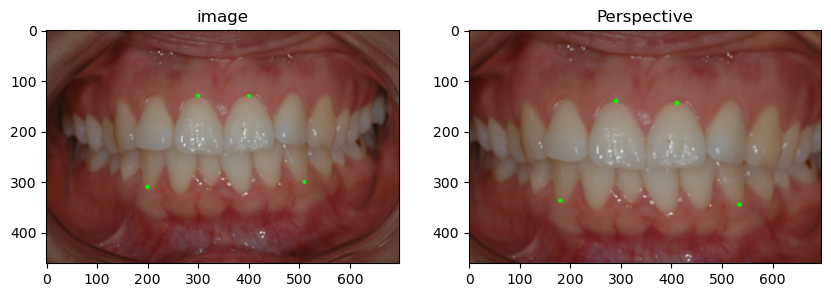

In [20]:
b_centers=np.array(b_centers).astype("float32")
a_centers=np.array(a_centers).astype("float32")

M = cv2.getPerspectiveTransform(b_centers, a_centers)
print(type(M))
print(M)

b2aView = cv2.warpPerspective(b, M, (b.shape[1],b.shape[0]))

# cv2.imwrite('/home/tkd_010/ImageProcessing/study/image_registeration/save0528/Perspective_Transform_B2A.png', \
#             cv2.cvtColor(b2aView, cv2.COLOR_RGB2BGR))

plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(b),plt.title('image')
plt.subplot(122),plt.imshow(b2aView),plt.title('Perspective')
plt.show()

### 특징점을 잘 잡으니 얼추 되는 것 같다.!!
- 이미지 블렌딩을 다양한 scale로 해서, 변화하는식으로? 보여주는건 어떤가?

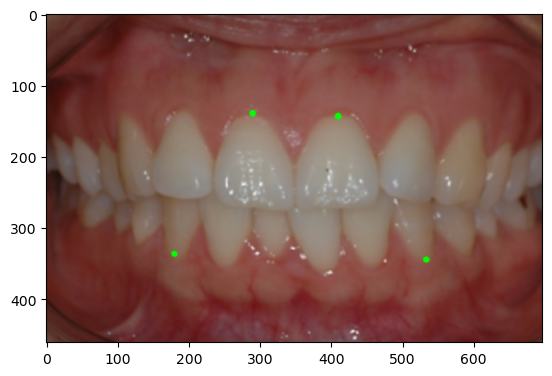

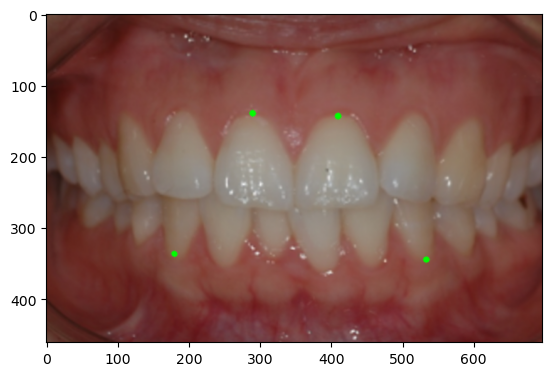

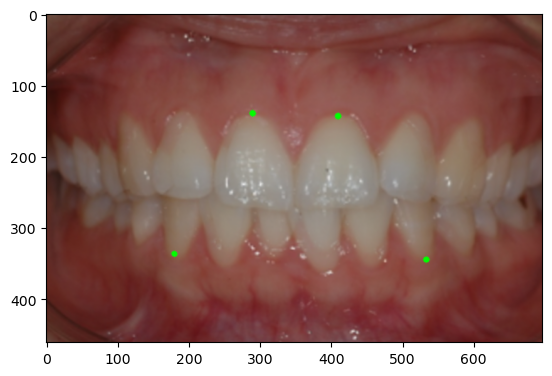

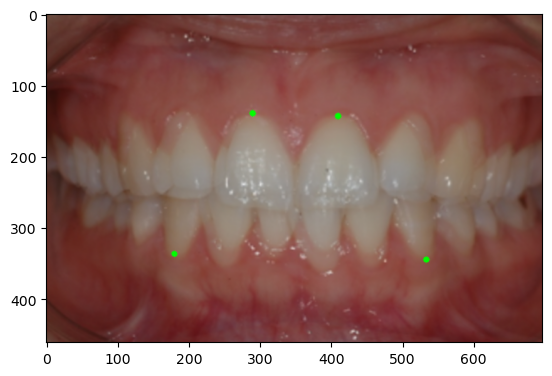

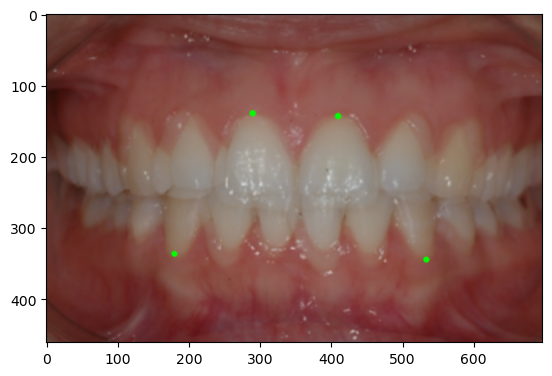

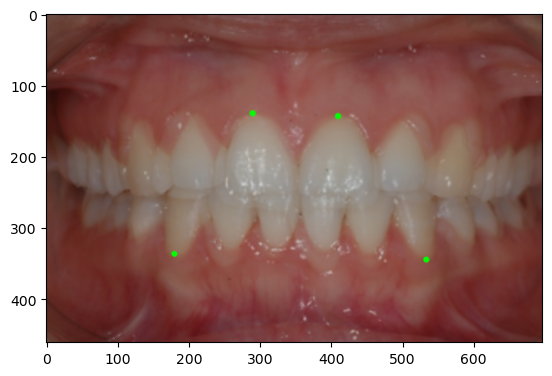

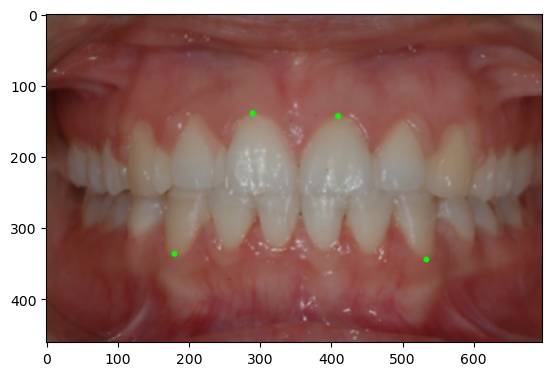

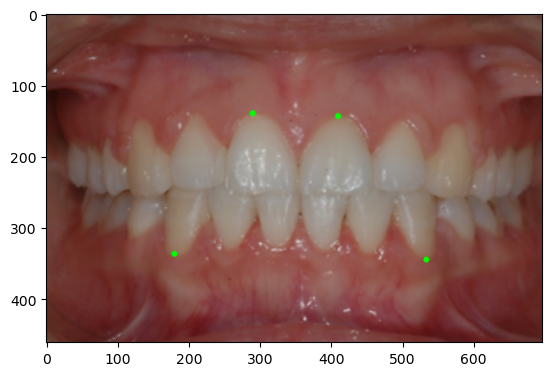

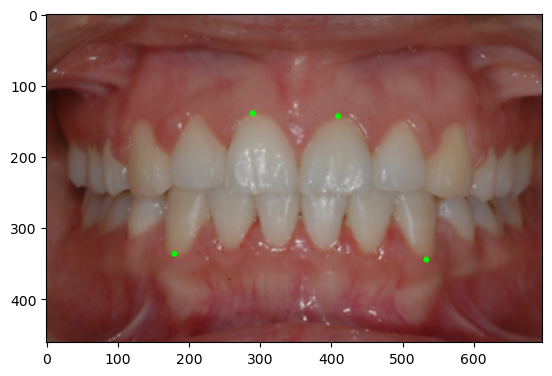

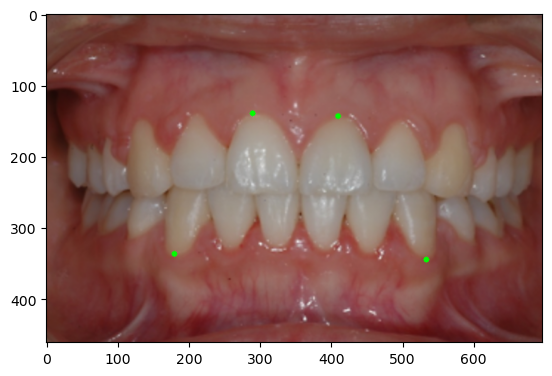

In [21]:
i = 0
for c in range(10):
    r = 1.0 - i
    dst = cv2.addWeighted(a, i, b2aView, r, 0)
    plt.imshow(dst, cmap='gray')
    plt.show()
    i += 0.1
    
    cv2.imwrite('/home/tkd_010/ImageProcessing/study/image_registeration/save0528/{}_dst_c.png'.format(float(i)), cv2.cvtColor(dst, cv2.COLOR_RGB2BGR))